### Random Sample Impuataion
Aim: Random sample imputation consists of taking random observation from the dataset and we use this obseravtion to replace the nan values.
#### When should it used?(MCAR, MNAR, MAR)
It assumes that the data are missing completely at random(MCAR)

In [1]:
import pandas as pd

In [2]:
df = pd.read_csv('titanic.csv', usecols=['age', 'fare', 'survived'])

In [3]:
df.isnull().sum()

age         174
fare          1
survived      0
dtype: int64

In [4]:
df.isnull().mean()

age         0.204706
fare        0.001176
survived    0.000000
dtype: float64

In [5]:
df.age.dropna().sample(df.age.isnull().sum(), random_state=0)

716    27.0
39     29.0
446    25.0
240     8.0
508    32.0
       ... 
801    47.0
669     9.0
768    21.0
16     40.0
250    48.0
Name: age, Length: 174, dtype: float64

In [6]:
def impute_nan(df, variable, median):
    df[variable + "_median"] = df[variable].fillna(median)
    df[variable + "_random"] = df[variable]
    
    ## it wil have the random sample to fill the na4
    random_sample = df[variable].dropna().sample(df[variable].isnull().sum(), random_state=0)
    
    ##pandas needs to have same index to merge the datset
#     random_sample.index = df[df[variable].isnull()].index
    
    df.loc[df[variable].isnull(), variable+"_random"] = random_sample

In [7]:
median_age = df.age.median()
median_fare = df.fare.median()

In [8]:
impute_nan(df, 'age', median_age)
impute_nan(df, 'fare', median_fare)

In [9]:
df.head()

,age,fare,survived,age_median,age_random,fare_median,fare_random
0,NaN,7.7333,1,28.0,NaN,7.7333,7.7333
1,38.0,8.6625,0,38.0,38.0,8.6625,8.6625
2,30.0,24.1500,0,30.0,30.0,24.1500,24.1500
3,54.0,23.0000,1,54.0,54.0,23.0000,23.0000
4,40.0,13.0000,0,40.0,40.0,13.0000,13.0000


In [10]:
import matplotlib.pyplot as plt 
%matplotlib inline

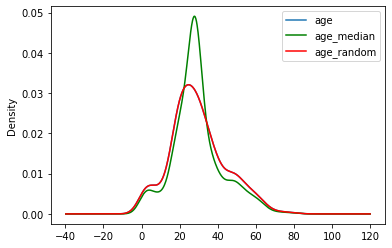

In [11]:
fig = plt.figure()
ax = fig.add_subplot(111)
df.age.plot(kind='kde', ax=ax)
df.age_median.plot(kind='kde', ax=ax, color='green')
df.age_random.plot(kind='kde', ax=ax, color='red')
ax.legend()

## Advantages and Disadvantages

### Advantages:
1. It easy to implement
2. There is less distortion in variance

### Disadvantes:
1. Every situation randomness wo't work

## 3. Capturing NaN values with a new features
It works well if the data are not missing completely at random

In [12]:
df = pd.read_csv('titanic.csv', usecols=['age', 'fare', 'survived'])
df.head()

,age,fare,survived
0,NaN,7.7333,1
1,38.0,8.6625,0
2,30.0,24.1500,0
3,54.0,23.0000,1
4,40.0,13.0000,0


In [13]:
import numpy as np

In [14]:
df.age.mean()

29.519847189349115

In [15]:
df.head()

,age,fare,survived
0,NaN,7.7333,1
1,38.0,8.6625,0
2,30.0,24.1500,0
3,54.0,23.0000,1
4,40.0,13.0000,0


In [16]:
df.age.fillna(df.age.median(), inplace=True)

## Advantages
1. Easy to implement
2. Caputes the importance of missing values

## Disadvantages
1. Creating Additional Features(Curse of Dimensonality)